(derivation-of-rk4-section)=
# Derivation of a fourth-order explicit Runge-Kutta method

We saw in the [previous section](rk2-derivation-section) that we obtain a set of order conditions by comparing the Taylor series expansions of the ODE $y'=f(t,y)$ to that of the general form for an [explicit Runge-Kutta method](explicit-and-implicit-rk-methods-section). If we do this using a fourth-order Taylor series expansion then we get the following order conditions (you will not be expected to remember or derive these order conditions).

````{admonition} Definition: Order conditions for a fourth-order explicit Runge-Kutta method
:class: note
:name: rk4-order-conditions-definition
```{math}
:label: rk4-order-conditions-equation
\begin{align}
    b_1 + b_2 + b_3 + b_4 &= 1,\\
    b_2 c_2 + b_3 c_3 + b_4 c_4 &=  \frac{1}{2},\\
    b_2 c_2^2 + b_3 c_3^2 + b_4 c_4^2 &= \frac{1}{3},\\
    b_2 c_2^3 + b_3 c_3^3 + b_4 c_4^3 &= \frac{1}{4},\\
    b_3 c_3 a_{32} c_2 + b_4 c_4 (a_{42} c_2 + a_{43} c_3 ) &= \frac{1}{8},\\
    b_3 a_{32} + b_4 a_{42} &= b_2 (1-c_2 ),\\
    b_4 a_{43} &= b_3 (1 - c_3 ),\\
    0 &= b_4 (1-c_4 ).
\end{align}
```
````

In addition to these, another condition that is placed on Runge-Kutta methods is the **row sum condition**.

````{admonition} Definition: Row sum condition
:class: note
:name: row-sum-condition

\begin{align}
    c_i =\sum_{j=1}^{s} a_{ij},
\end{align}
i.e., the value of $c_i$ is equal to the sum of row $i$ of the matrix $A$. 
````

Since we have an explicit method we know that $c_1 = 0$ then the row sum conditions for a fourth-order explicit method are

````{math}
:label: rk4-row-sum-conditions-equation

\begin{align*}
    c_2 &=a_{21} ,\\
    c_3 &=a_{31} + a_{32} ,\\
    c_4 &=a_{41} + a_{42} + a_{43} .
\end{align*}
````

Combining the conditions in equations {eq}`rk4-order-conditions-equation` and {eq}`rk4-row-sum-conditions-equation` then we have a total of 11 order conditions expressed in 13 unknowns  which can be expressed in the Butcher tableau

\begin{align*}
    \begin{array}{c|cccc}
        0 & 0 \\
        c_2 & a_{21} \\
        c_3 & a_{31} & a_{32} \\
        c_4 & a_{41} & a_{42} & a_{43} \\ \hline
        & b_1 & b_2 & b_3 & b_4
    \end{array}
\end{align*}

To determine a unique solution we choose values for some of the unknowns and solve the order conditions for the remaining unknowns.

(rk4-derivation-example)=
````{admonition} Example 2.3
:class: seealso

Derive a fourth-order Runge-Kutta method where $c_2 = c_3 = \frac{1}{2}$, $c_4 =1$ and $b_2 = \frac{1}{3}$.

**Solution**

Substituting the known values of $c_2$, $c_3$, $c_4$ and $b_2$ into the [first three order conditions](rk4-order-conditions-definition) (we only need the first three to solve for $b_1$, $b_3$ and $b_4$) we have

\begin{align*}
    b_1 + b_3 + b_4 &= \frac{2}{3}, \\
    \frac{1}{2}b_3 + b_4 &= \frac{1}{3}, \\
    \frac{1}{4}b_3 + b_4 &= \frac{1}{4}.
\end{align*}
    
Subtracting the third order condition from the second gives

\begin{align*}
    \frac{1}{4}b_3 = \frac{1}{12},
\end{align*}

therefore $b_3 = \frac{1}{3}$ and from the third order condition we have $b_4 = \frac{1}{6}$. Substituting $b_3$ and $b_4$ into the first order condition gives $b_1 = \frac{1}{3}$. Substituting the known values of $b_3$ and $c_3$ into the seventh order condition gives
    
\begin{align*}
    \frac{1}{6}a_{43} &= \frac{1}{3}(1 - \frac{1}{2}) = \frac{1}{6},
\end{align*}

so $a_{43} = 1$. Substituting the known values of $b_i$ and $c_i$ into the sixth order condtion gives

\begin{align*}
    \left( \frac{1}{3} \right) \left( \frac{1}{2} \right) \left( \frac{1}{2} \right) a_{32} + \frac{1}{6} \left( \frac{1}{2} a_{42} + \frac{1}{2} \right) &= \frac{1}{8}, \\
    \left( \frac{1}{3} \right) a_{32} + \left( \frac{1}{6} \right) a_{42} &= \frac{1}{3} \left( 1 - \frac{1}{2} \right),
\end{align*}

so we have the system 

\begin{align*}
    \frac{1}{12}a_{32} + \frac{1}{12}a_{42} &= \frac{1}{24}, \\
    \frac{1}{3}a_{32} + \frac{1}{6}a_{42} &= \frac{1}{6}.
\end{align*}
    
Subtracting 2 times the first equation from the second 

\begin{align*}
    \frac{1}{6}a_{32} &= \frac{1}{12}
\end{align*}

so $a_{32} = \frac{1}{2}$ and $a_{42} = 0$. Substituting these into the [row sum condition](row-sum-condition) we have

\begin{align*}
    \frac{1}{2} &= a_{21}, \\
    \frac{1}{2} &= a_{31} + \frac{1}{2}, \\
    1 &= a_{41} + 1,
\end{align*}

so $a_{21} = \frac{1}{2}$, $a_{31} = 0$ and $a_{41} = 0$. We now have the values of all of the coefficients so this fourth-order explicit Runge-Kutta method is

\begin{align*}
    y_{n+1} &=y_n +\frac{h}{6}(k_1 +2 k_2 +2k_3 +k_4 ),\\
    k_1 &=f(t_n ,y_n ),\\
    k_2 &=f(t_n +\tfrac{1}{2}h,y_n +\tfrac{1}{2}h k_1 ),\\
    k_3 &=f(t_n +\tfrac{1}{2}h,y_n +\tfrac{1}{2}h k_2 ),\\
    k_4 &=f(t_n +h,y_n +hk_3 ),
\end{align*}

which has the Butcher tableau

\begin{align*}
    \begin{array}{c|cccc}
        0 &  &  &  & \\
        \frac{1}{2} & \frac{1}{2} &  &  & \\
        \frac{1}{2} & 0 & \frac{1}{2} &  & \\
        1 & 0 & 0 & 1 & \\ \hline
        & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6}
    \end{array}
\end{align*}
````

This fourth-order explicit Runge-Kutta method derived above is often referred to as *the* Runge-Kutta method or **RK4** for short.

````{admonition} Definition: Fourth-order explicit Runge-Kutta method (RK4)
:class: note
:name: rk4-definition

```{math}
:label: rk4-equation
\begin{align*}
    y_{n+1} &= y_n + \frac{h}{6}(k_1 + 2 k_2 + 2 k_3 + k_4), \\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + \tfrac{1}{2} h, y_n + \tfrac{1}{2} h k_1), \\
    k_3 &= f(t_n + \tfrac{1}{2} h, y_n + \tfrac{1}{2} h k_2), \\
    k_4 &= f(t_n + h, y_n + h k_3).
\end{align*} 
```
````

## Using Python to solve the order conditions

The code below derives the fourth-order explicit Runge-Kutta method from the [example](#rk4-derivation-example) above using SymPy.

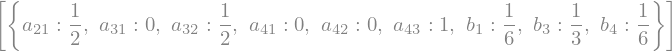

In [1]:
from sympy import *
init_printing()

# Declare symbolic variables
a21, a31, a32, a41, a42, a43 = symbols('a21, a31, a32, a41, a42, a43')
b1, b2, b3, b4 = symbols('b1, b2, b3, b4')
c2, c3, c4 = symbols('c2, c3, c4')

# Choose 4 values for the unkowns
c2, c3, c4, b2 = Rational(1,2), Rational(1,2), 1, Rational(1,3)

# Define order conditions
eq1 = b1 + b2 + b3 + b4 - 1
eq2 = b2 * c2 + b3 * c3 + b4 * c4 - Rational(1,2)
eq3 = b2 * c2 ** 2 + b3 * c3 ** 2 + b4 * c4 ** 2 - Rational(1,3)
eq4 = b2 * c2 ** 3 + b3 * c3 ** 3 + b4 * c4 ** 4 - Rational(1,4)
eq5 = b3 * c3 * a32 * c2 + b4 * c4 * (a42 * c2 + a43 * c3) - Rational(1,8)
eq6 = b3 * a32 + b4 * a42 - b2 * (1 - c2)
eq7 = b4 * a43 - b3 * (1 - c3)
eq8 = b4 * (1 - c4)
eq9 = c2 - a21
eq10 = c3 - a31 - a32
eq11 = c4 - a41- a42 - a43

# Solve order conditions
solve((eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10, eq11))